# SourceDrill – Project Report
#### Krzysztof Główka, Katarzyna Koprowska

The project idea was to automatically find the content of cited scientific article related the most to the citation context. We used [corpus] with annotated pairs of papers, narrowing it down to only one field: psychology.

## Data

## Analysis

### Embeddings

In [6]:
import ipyplot

We started by calculating cosine distance between GloVe embedding representing citation context and embeddings of cited text chunks. Displayed below are examples of 1-cosine distance on single sentences.

In [5]:
images_list = ["figures/sentence_"+str(i)+".png" for i in range(3)]
ipyplot.plot_images(images_list, max_images=3, img_width=300)

#### We tried to compare it with different chunk sizes.

Whole sections:

In [4]:
images_list = ["figures/section_"+str(i)+".png" for i in range(3)]
ipyplot.plot_images(images_list, max_images=3, img_width=300)

3 sentences per chunk:

In [8]:
images_list = ["figures/3_sent_"+str(i)+".png" for i in range(3)]
ipyplot.plot_images(images_list, max_images=3, img_width=300)

### Example

In [46]:
import pickle
import warnings
warnings.filterwarnings("ignore")
with open("first_results.p", "rb") as file:
    results = pickle.load(file)
with open("preprocessed.p", "rb") as file:
    preprocessed = pickle.load(file)

In [47]:
preprocessed["original"]["citing_context"]

'et al., 1985) , and Self-Efficacy (SE), which demonstrates whether an individual believes they can engage in or sustain a behavior change during difficult situations (Bandura, 1977) . Though educational interventions to increase patient motivation to pursue LDKT exist, Waterman et al. (2015) presents the development of the first theoretically consistent and validated TTM measures to assess the motivation of kidney patients to pursue LDKT. Further psychometric analysis, such as testing measurement invariance, could support the use of these measures across important'

In [48]:
preprocessed["val_orig_paper_0"]["citing_context"]

". Sleep deprivation has serious negative consequences for people's health and well-being: it causes hormonal and immunological disruptions that put people at risk for developing diabetes, obesity, cancer, cardiovascular disease, chronic infections, and neuropsychiatric diseases (Strine and Chapman, 2005; Irwin, 2015) . Sleep deprivation reduces health-related quality of life (Paiva et al., 2015) and contributes to increased mortality (Gallicchio and Kalesan, 2009 ). Sleep researchers have long focused on identifying medical causes for sleep insufficiency (e.g., sleep apnea, insomnia), but"

In [49]:
preprocessed["val_orig_paper_1"]["citing_context"]

'significant or marginal (p < .10, two-tailed) differences in normative valence or arousal across all trial types in the experiment.Day 1: preexposure. In the preexposure session, participants first received training in reappraisal using psychological distancing (Ochsner & Gross, 2008; Trope & Liberman, 2010) . They were told that they would see a number of trials, each beginning with an instruction cue word presented in the center of a computer screen: either "LOOK" or "DECREASE." The experimenter explained that when the cue was'

#### Original: citing context linked to the cited paper

In [50]:
from plot_text_sim import *
results[0]["original"]['text_beginning'] = results[0]["original"].index.str[:10]
_ = plot_text_sim(results[0]["original"]['bert_original_cos'], results[0]["original"].index)

#### Validation 2: random paper citing context with original cited paper

In [55]:
results[0]["val_orig_paper_0"]['text_beginning'] = results[0]["val_orig_paper_0"].index.str[:10]
_ = plot_text_sim(results[0]["val_orig_paper_0"]['bert_val_orig_paper_0_cos'], results[0]["val_orig_paper_0"].index)

In [62]:
from scipy.stats import spearmanr
spearmanr(results[0]["val_orig_paper_0"]['roberta_val_orig_paper_0_cos'], results[0]["original"]['roberta_original_cos'])

SpearmanrResult(correlation=0.7943434104865374, pvalue=9.240931089598628e-33)

#### Validation 1: original citing context with random paper

In [54]:
results[0]["val_orig_context_0"]['text_beginning'] = results[0]["val_orig_context_0"].index.str[:10]
_ = plot_text_sim(results[0]["val_orig_context_0"]['bert_val_orig_context_0_cos'], results[0]["val_orig_context_0"].index)


In [57]:
with open("first_results_mean.p", "rb") as file:
    mean_res = pickle.load(file)

<BarContainer object of 30 artists>

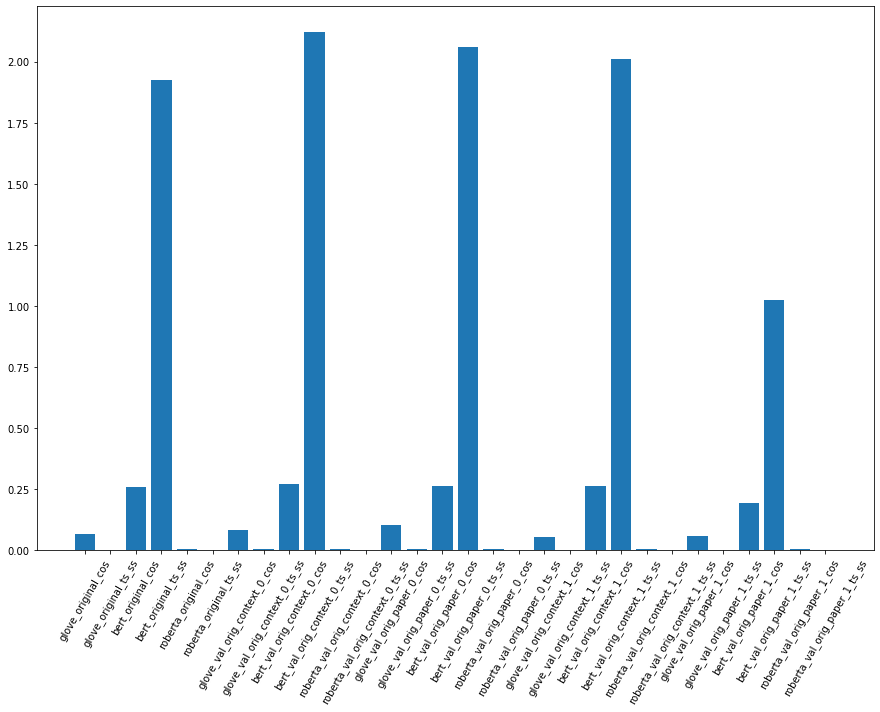

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
data = {i : j for subdict in mean_res.values() for i, j in subdict.items()}
data = pd.DataFrame(data.values(), index = data.keys()).rename(columns={0 : "score"})
fig = plt.figure(figsize=(15, 10))
plt.xticks(rotation=60)
plt.bar(data.index, data["score"])

In [59]:
data

,score
glove_original_cos,0.064573
glove_original_ts_ss,0.001059
bert_original_cos,0.255802
bert_original_ts_ss,1.924498
roberta_original_cos,0.003507
roberta_original_ts_ss,0.000749
glove_val_orig_context_0_cos,0.083000
glove_val_orig_context_0_ts_ss,0.001745
bert_val_orig_context_0_cos,0.268017
bert_val_orig_context_0_ts_ss,2.120458


### Bag-Of-Words

### Metrics comparison

HIPLOT

## Conclusions